Convolutional Constained MOD
============================

This example demonstrates the use of [ccmod.ConvCnstrMOD_Consensus](http://sporco.rtfd.org/en/latest/modules/sporco.admm.ccmod.html#sporco.admm.ccmod.ConvCnstrMOD_Consensus) for computing a convolutional dictionary update via the convolutional constrained method of optimal directions problem [[1]](http://sporco.rtfd.org/en/latest/zreferences.html#sorel-2016-fast) [[25]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2018-convolutional1). This problem is mainly useful as a component within convolutional dictionary learning, but its use is demonstrated here since a user may wish to construct such objects as part of a custom convolutional dictionary learning algorithm, using [dictlrn.DictLearn](http://sporco.rtfd.org/en/latest/modules/sporco.dictlrn.dictlrn.html#sporco.dictlrn.dictlrn.DictLearn).

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco.admm import cbpdn
from sporco.admm import ccmod
from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])
S = np.dstack((S1, S2, S3, S4, S5))

Highpass filter training images.

In [3]:
npd = 16
fltlmbd = 5
sl, sh = signal.tikhonov_filter(S, fltlmbd, npd)

Load initial dictionary.

In [4]:
D0 = util.convdicts()['G:12x12x36']

Compute sparse representation on current dictionary.

In [5]:
lmbda = 0.1
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 100,
                     'HighMemSolve': True})
c = cbpdn.ConvBPDN(D0, sh, lmbda, opt)
X = c.solve()

Itn   Fnc       DFid      Regℓ1     r         s         ρ       
----------------------------------------------------------------


   0  4.13e+02  2.48e+01  3.88e+03  9.11e-01  1.90e-01  6.00e+00
   1  3.31e+02  7.06e+01  2.60e+03  6.12e-01  2.76e-01  6.00e+00
   2  2.99e+02  7.08e+01  2.28e+03  3.06e-01  2.46e-01  6.00e+00


   3  3.00e+02  6.52e+01  2.35e+03  2.25e-01  1.88e-01  4.73e+00
   4  3.08e+02  5.90e+01  2.49e+03  1.96e-01  1.31e-01  3.66e+00
   5  2.97e+02  5.68e+01  2.40e+03  1.70e-01  9.63e-02  3.17e+00


   6  2.71e+02  5.55e+01  2.15e+03  1.38e-01  7.91e-02  3.17e+00
   7  2.48e+02  5.56e+01  1.92e+03  1.14e-01  6.64e-02  3.17e+00
   8  2.33e+02  5.59e+01  1.77e+03  9.44e-02  5.49e-02  3.17e+00


   9  2.23e+02  5.63e+01  1.67e+03  7.90e-02  4.64e-02  3.17e+00
  10  2.16e+02  5.66e+01  1.60e+03  6.63e-02  4.07e-02  3.17e+00
  11  2.13e+02  5.68e+01  1.56e+03  6.01e-02  3.63e-02  2.86e+00


  12  2.12e+02  5.67e+01  1.55e+03  5.51e-02  3.23e-02  2.60e+00
  13  2.11e+02  5.66e+01  1.54e+03  4.83e-02  2.86e-02  2.60e+00
  14  2.09e+02  5.64e+01  1.52e+03  4.27e-02  2.56e-02  2.60e+00


  15  2.05e+02  5.63e+01  1.49e+03  3.80e-02  2.35e-02  2.60e+00
  16  2.02e+02  5.63e+01  1.46e+03  3.61e-02  2.17e-02  2.34e+00
  17  2.00e+02  5.64e+01  1.44e+03  3.46e-02  1.97e-02  2.14e+00


  18  1.98e+02  5.64e+01  1.42e+03  3.16e-02  1.77e-02  2.14e+00
  19  1.97e+02  5.65e+01  1.40e+03  2.90e-02  1.61e-02  2.14e+00
  20  1.95e+02  5.65e+01  1.39e+03  2.67e-02  1.49e-02  2.14e+00


  21  1.94e+02  5.66e+01  1.37e+03  2.46e-02  1.38e-02  2.14e+00
  22  1.92e+02  5.66e+01  1.36e+03  2.27e-02  1.29e-02  2.14e+00
  23  1.91e+02  5.66e+01  1.34e+03  2.11e-02  1.21e-02  2.14e+00


  24  1.89e+02  5.66e+01  1.33e+03  1.97e-02  1.14e-02  2.14e+00
  25  1.88e+02  5.66e+01  1.31e+03  1.84e-02  1.07e-02  2.14e+00
  26  1.87e+02  5.66e+01  1.30e+03  1.72e-02  1.01e-02  2.14e+00


  27  1.86e+02  5.67e+01  1.29e+03  1.62e-02  9.53e-03  2.14e+00
  28  1.85e+02  5.67e+01  1.28e+03  1.52e-02  9.02e-03  2.14e+00
  29  1.84e+02  5.67e+01  1.27e+03  1.44e-02  8.57e-03  2.14e+00


  30  1.83e+02  5.68e+01  1.26e+03  1.36e-02  8.14e-03  2.14e+00
  31  1.82e+02  5.68e+01  1.26e+03  1.29e-02  7.73e-03  2.14e+00
  32  1.82e+02  5.68e+01  1.25e+03  1.22e-02  7.33e-03  2.14e+00


  33  1.81e+02  5.68e+01  1.25e+03  1.21e-02  6.95e-03  1.95e+00
  34  1.81e+02  5.68e+01  1.24e+03  1.16e-02  6.54e-03  1.95e+00
  35  1.81e+02  5.69e+01  1.24e+03  1.10e-02  6.15e-03  1.95e+00


  36  1.80e+02  5.69e+01  1.23e+03  1.05e-02  5.79e-03  1.95e+00
  37  1.80e+02  5.69e+01  1.23e+03  1.00e-02  5.48e-03  1.95e+00
  38  1.79e+02  5.69e+01  1.22e+03  9.57e-03  5.21e-03  1.95e+00


  39  1.79e+02  5.69e+01  1.22e+03  9.12e-03  4.96e-03  1.95e+00
  40  1.78e+02  5.70e+01  1.21e+03  8.70e-03  4.74e-03  1.95e+00
  41  1.78e+02  5.70e+01  1.21e+03  8.29e-03  4.52e-03  1.95e+00


  42  1.78e+02  5.70e+01  1.21e+03  7.91e-03  4.30e-03  1.95e+00
  43  1.77e+02  5.70e+01  1.20e+03  7.56e-03  4.10e-03  1.95e+00
  44  1.77e+02  5.70e+01  1.20e+03  7.22e-03  3.92e-03  1.95e+00


  45  1.76e+02  5.70e+01  1.19e+03  6.90e-03  3.75e-03  1.95e+00
  46  1.76e+02  5.70e+01  1.19e+03  6.59e-03  3.58e-03  1.95e+00
  47  1.76e+02  5.71e+01  1.19e+03  6.31e-03  3.41e-03  1.95e+00


  48  1.76e+02  5.71e+01  1.19e+03  6.03e-03  3.26e-03  1.95e+00
  49  1.75e+02  5.71e+01  1.18e+03  5.77e-03  3.12e-03  1.95e+00
  50  1.75e+02  5.71e+01  1.18e+03  5.52e-03  2.99e-03  1.95e+00


  51  1.75e+02  5.71e+01  1.18e+03  5.28e-03  2.87e-03  1.95e+00
  52  1.74e+02  5.71e+01  1.17e+03  5.05e-03  2.75e-03  1.95e+00
  53  1.74e+02  5.71e+01  1.17e+03  4.84e-03  2.63e-03  1.95e+00


  54  1.74e+02  5.71e+01  1.17e+03  4.64e-03  2.51e-03  1.95e+00
  55  1.74e+02  5.71e+01  1.17e+03  4.44e-03  2.41e-03  1.95e+00
  56  1.74e+02  5.71e+01  1.16e+03  4.26e-03  2.31e-03  1.95e+00


  57  1.73e+02  5.71e+01  1.16e+03  4.09e-03  2.22e-03  1.95e+00
  58  1.73e+02  5.72e+01  1.16e+03  3.93e-03  2.12e-03  1.95e+00
  59  1.73e+02  5.72e+01  1.16e+03  3.78e-03  2.03e-03  1.95e+00


  60  1.73e+02  5.72e+01  1.16e+03  3.63e-03  1.94e-03  1.95e+00
  61  1.73e+02  5.72e+01  1.16e+03  3.48e-03  1.87e-03  1.95e+00


  62  1.73e+02  5.72e+01  1.15e+03  3.34e-03  1.80e-03  1.95e+00
  63  1.72e+02  5.72e+01  1.15e+03  3.21e-03  1.73e-03  1.95e+00
  64  1.72e+02  5.72e+01  1.15e+03  3.09e-03  1.66e-03  1.95e+00


  65  1.72e+02  5.72e+01  1.15e+03  2.97e-03  1.59e-03  1.95e+00
  66  1.72e+02  5.72e+01  1.15e+03  2.86e-03  1.53e-03  1.95e+00
  67  1.72e+02  5.72e+01  1.15e+03  2.75e-03  1.47e-03  1.95e+00


  68  1.72e+02  5.72e+01  1.15e+03  2.65e-03  1.42e-03  1.95e+00
  69  1.72e+02  5.72e+01  1.14e+03  2.54e-03  1.36e-03  1.95e+00
  70  1.71e+02  5.72e+01  1.14e+03  2.45e-03  1.32e-03  1.95e+00


  71  1.71e+02  5.72e+01  1.14e+03  2.36e-03  1.27e-03  1.95e+00
  72  1.71e+02  5.72e+01  1.14e+03  2.27e-03  1.23e-03  1.95e+00
  73  1.71e+02  5.72e+01  1.14e+03  2.19e-03  1.19e-03  1.95e+00


  74  1.71e+02  5.72e+01  1.14e+03  2.11e-03  1.14e-03  1.95e+00
  75  1.71e+02  5.72e+01  1.14e+03  2.03e-03  1.09e-03  1.95e+00
  76  1.71e+02  5.72e+01  1.14e+03  1.96e-03  1.05e-03  1.95e+00


  77  1.71e+02  5.72e+01  1.14e+03  1.88e-03  1.00e-03  1.95e+00
  78  1.71e+02  5.72e+01  1.14e+03  1.81e-03  9.68e-04  1.95e+00
  79  1.71e+02  5.72e+01  1.13e+03  1.75e-03  9.34e-04  1.95e+00


  80  1.71e+02  5.72e+01  1.13e+03  1.69e-03  9.00e-04  1.95e+00
  81  1.71e+02  5.73e+01  1.13e+03  1.63e-03  8.65e-04  1.95e+00
  82  1.70e+02  5.73e+01  1.13e+03  1.57e-03  8.31e-04  1.95e+00


  83  1.70e+02  5.73e+01  1.13e+03  1.51e-03  7.98e-04  1.95e+00
  84  1.70e+02  5.73e+01  1.13e+03  1.46e-03  7.68e-04  1.95e+00
  85  1.70e+02  5.73e+01  1.13e+03  1.41e-03  7.41e-04  1.95e+00


  86  1.70e+02  5.73e+01  1.13e+03  1.36e-03  7.16e-04  1.95e+00
  87  1.70e+02  5.73e+01  1.13e+03  1.31e-03  6.93e-04  1.95e+00
  88  1.70e+02  5.73e+01  1.13e+03  1.26e-03  6.71e-04  1.95e+00


  89  1.70e+02  5.73e+01  1.13e+03  1.22e-03  6.49e-04  1.95e+00
  90  1.70e+02  5.73e+01  1.13e+03  1.18e-03  6.26e-04  1.95e+00
  91  1.70e+02  5.73e+01  1.13e+03  1.14e-03  6.04e-04  1.95e+00


  92  1.70e+02  5.73e+01  1.13e+03  1.10e-03  5.81e-04  1.95e+00
  93  1.70e+02  5.73e+01  1.13e+03  1.06e-03  5.61e-04  1.95e+00
  94  1.70e+02  5.73e+01  1.13e+03  1.03e-03  5.41e-04  1.95e+00


  95  1.70e+02  5.73e+01  1.13e+03  9.94e-04  5.25e-04  1.95e+00
----------------------------------------------------------------


Update dictionary for training image set.

In [6]:
opt = ccmod.ConvCnstrMOD_Consensus.Options({'Verbose': True,
            'MaxMainIter': 100, 'rho': 1e1})
c = ccmod.ConvCnstrMOD_Consensus(X, sh, D0.shape, opt)
c.solve()
D1 = c.getdict().squeeze()
print("ConvCnstrMOD_Consensus solve time: %.2fs" % c.timer.elapsed('solve'))

Itn   DFid      Cnstr     r         s       
--------------------------------------------


   0  5.67e+01  6.45e-07  9.62e-01  1.01e+00


   1  5.52e+01  7.82e-07  4.95e-01  2.47e-02


   2  5.08e+01  9.14e-07  7.64e-01  1.35e-01


   3  5.04e+01  7.54e-07  3.83e-01  2.98e-02


   4  5.00e+01  6.34e-07  4.89e-01  5.99e-02
   5  4.99e+01  7.17e-07  2.84e-01  2.17e-02


   6  4.97e+01  7.80e-07  3.13e-01  3.07e-02


   7  4.97e+01  8.14e-07  2.02e-01  1.59e-02
   8  4.96e+01  6.99e-07  2.00e-01  1.92e-02


   9  4.96e+01  8.25e-07  1.39e-01  1.19e-02


  10  4.96e+01  7.50e-07  1.28e-01  1.24e-02
  11  4.96e+01  9.23e-07  9.34e-02  8.35e-03


  12  4.96e+01  1.15e-06  8.21e-02  7.85e-03


  13  4.96e+01  8.69e-07  6.18e-02  5.69e-03
  14  4.96e+01  8.08e-07  5.25e-02  5.16e-03


  15  4.95e+01  8.00e-07  4.04e-02  4.00e-03


  16  4.95e+01  7.76e-07  3.36e-02  3.58e-03
  17  4.95e+01  8.38e-07  2.62e-02  2.90e-03


  18  4.95e+01  9.58e-07  2.15e-02  2.56e-03


  19  4.95e+01  1.09e-06  1.69e-02  2.12e-03
  20  4.95e+01  8.63e-07  1.38e-02  1.86e-03


  21  4.95e+01  7.54e-07  1.09e-02  1.56e-03


  22  4.95e+01  9.05e-07  8.82e-03  1.36e-03


  23  4.95e+01  8.52e-07  7.01e-03  1.16e-03


  24  4.95e+01  8.09e-07  5.64e-03  1.02e-03


  25  4.95e+01  8.24e-07  4.50e-03  8.90e-04
  26  4.95e+01  9.02e-07  3.61e-03  7.90e-04


  27  4.95e+01  8.33e-07  2.88e-03  6.98e-04


  28  4.95e+01  7.30e-07  2.31e-03  6.27e-04
  29  4.95e+01  7.61e-07  1.85e-03  5.63e-04


  30  4.95e+01  7.25e-07  1.48e-03  5.13e-04


  31  4.95e+01  8.14e-07  1.19e-03  4.69e-04
  32  4.95e+01  7.94e-07  9.52e-04  4.35e-04
--------------------------------------------
ConvCnstrMOD_Consensus solve time: 3.36s


Display initial and final dictionaries.

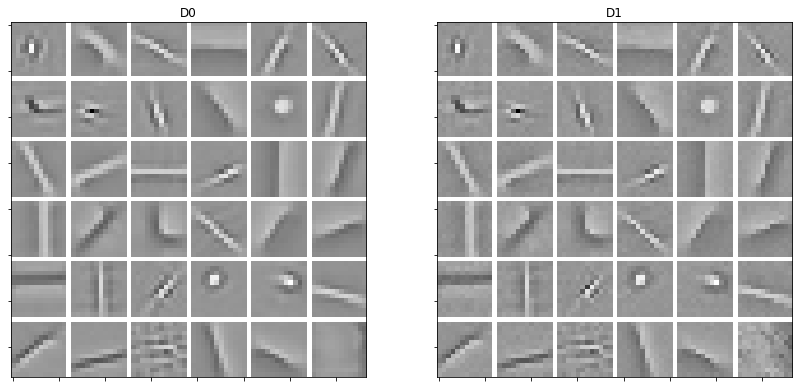

In [7]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

Get iterations statistics from CCMOD solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

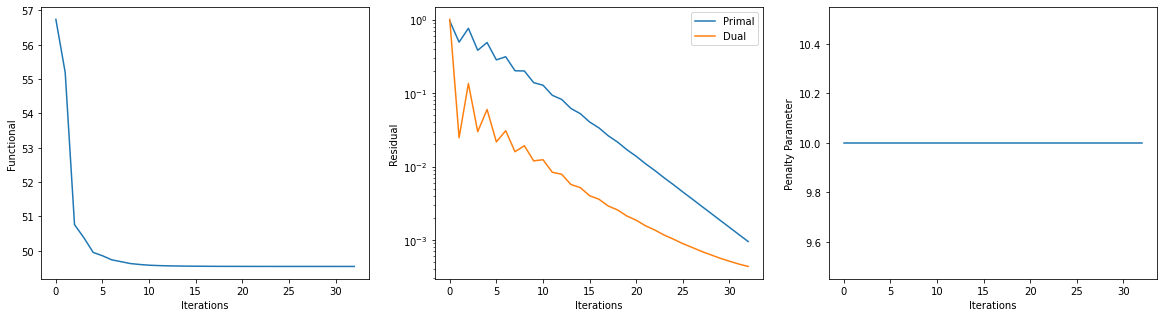

In [8]:
its = c.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.DFid, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()